Accuracy on test split: 0.7877094972067039


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


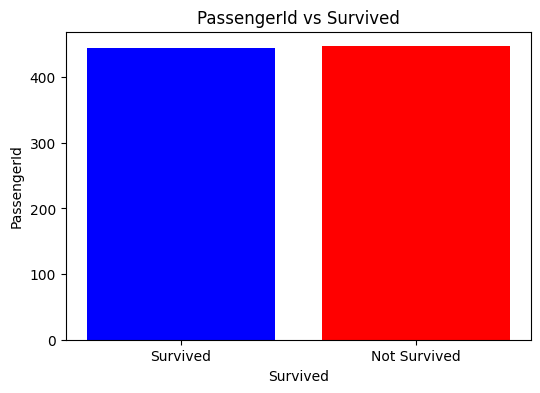

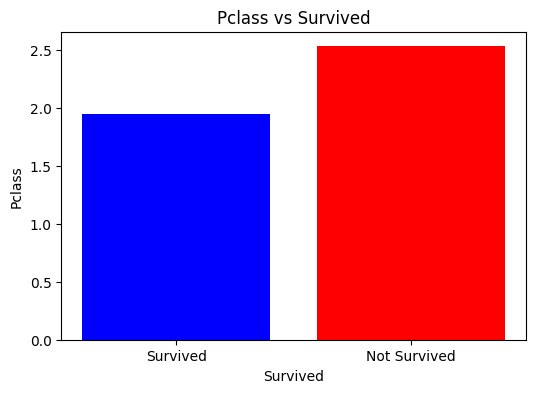

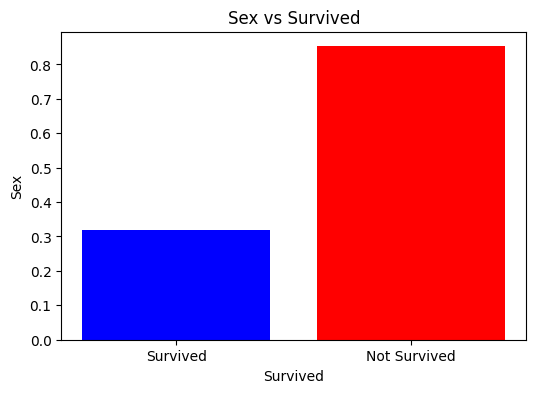

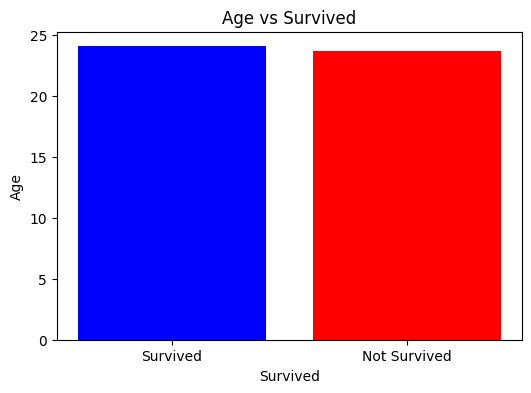

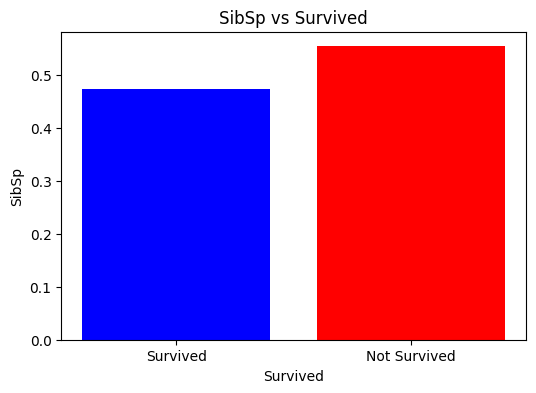

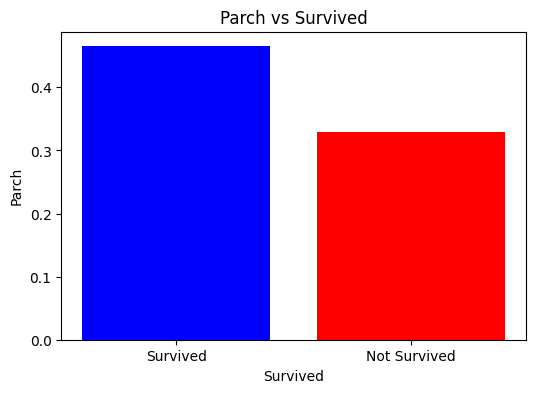

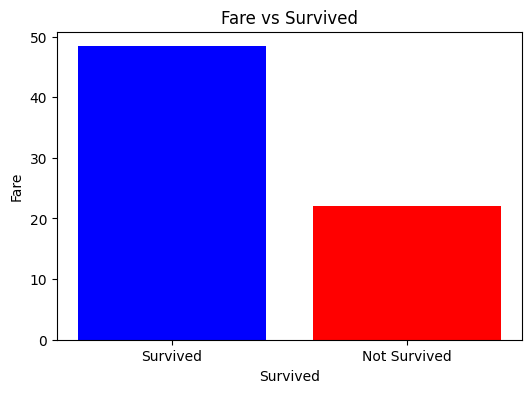

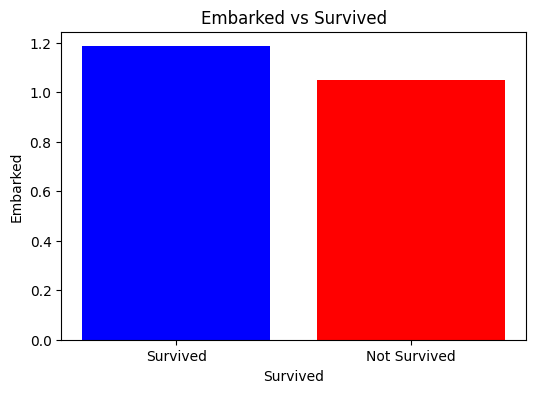

In [7]:
#LOGISTIC REGRESSION

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load training data
train_data = pd.read_csv("/content/train (1).csv")

train_data= train_data.drop('Name', axis=1)
train_data= train_data.drop('Cabin', axis=1)
train_data= train_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
train_data["Sex"] = train_data["Sex"].replace({"male": 1, "female": 0})
train_data["Embarked"] = train_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})
train_data["Age"].fillna(0, inplace=True)
# Split features and target variable
X_train = train_data.drop("Survived", axis=1) # Assuming "Target" is the name of the target variable column
y_train = train_data["Survived"]

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform  training  data
X_train = imputer.transform(X_train)
# Convert X_train back to DataFrame
X_train = pd.DataFrame(X_train, columns=train_data.drop("Survived", axis=1).columns)

# Now you can train your model and make predictions

# Load test data
test_data = pd.read_csv("/content/test (1).csv")
test_data= test_data.drop('Name', axis=1)
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
test_data["Age"].fillna(0, inplace=True)
test_data["Sex"] = test_data["Sex"].replace({"male": 1, "female": 0})
test_data["Embarked"] = test_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})
# Assuming test data doesn't contain the target variable
# Train-test split for evaluation

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on training data
log_reg.fit(X_train_split, y_train_split)

# Predict on test split
y_pred = log_reg.predict(X_test_split)

# Calculate accuracy on test split
accuracy = accuracy_score(y_test_split, y_pred)
print("Accuracy on test split:", accuracy)

# Now, you can use the trained model to predict on the test data
# Assuming test data doesn't contain the target variable, we'll just use X_test_split for demonstration purposes
test_predictions = log_reg.predict(X_test_split)
# Or if you have another test dataset
# test_predictions = log_reg.predict(test_data)

# Plot bar graphs for all features separately, distinguishing between survived and not survived
for feature in X_train.columns:
    survived_means = X_train[feature][y_train == 1].mean()
    not_survived_means = X_train[feature][y_train == 0].mean()

    plt.figure(figsize=(6, 4))
    plt.bar(['Survived', 'Not Survived'], [survived_means, not_survived_means], color=['blue', 'red'])
    plt.xlabel('Survived')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Survived')
    plt.show()


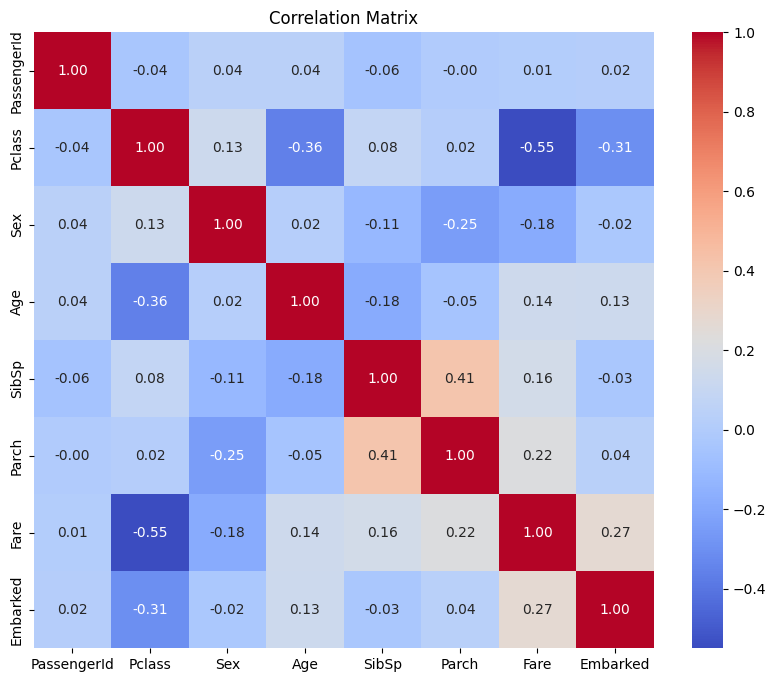

In [2]:
import seaborn as sns  # Import seaborn for heatmap
# Calculate correlation matrix
correlation_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Accuracy on test split: 0.5977653631284916


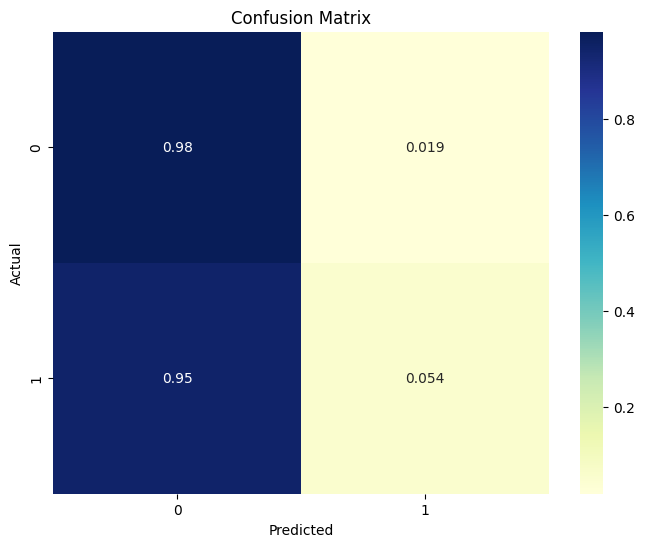

In [8]:

#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
train_data = pd.read_csv("/content/train (1).csv")

train_data= train_data.drop('Name', axis=1)
train_data= train_data.drop('Cabin', axis=1)
train_data= train_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
train_data["Sex"] = train_data["Sex"].replace({"male": 1, "female": 0})
train_data["Embarked"] = train_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})
train_data["Age"].fillna(0, inplace=True)
# Split features and target variable
X_train = train_data.drop("Survived", axis=1) # Assuming "Target" is the name of the target variable column
y_train = train_data["Survived"]

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform  training  data
X_train = imputer.transform(X_train)

# Load test data
test_data = pd.read_csv("/content/test (1).csv")
test_data= test_data.drop('Name', axis=1)
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
test_data["Age"].fillna(0, inplace=True)
test_data["Sex"] = test_data["Sex"].replace({"male": 1, "female": 0})
test_data["Embarked"] = test_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})

# Assuming test data doesn't contain the target variable
# Train-test split for evaluation
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize Support Vector Machine model
svm_model = SVC()

# Fit the model on training data
svm_model.fit(X_train_split, y_train_split)

# Predict on test split
y_pred = svm_model.predict(X_test_split)

# Calculate accuracy on test split
accuracy = accuracy_score(y_test_split, y_pred)
print("Accuracy on test split:", accuracy)

# Now, let's visualize the results

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test_split, y_pred, rownames=['Actual'], colnames=['Predicted'], normalize='index'), annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# Plotting the decision boundary (works only for 2 features)
if X_train.shape[1] == 2:
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


#This code fits an SVM model to the Titanic dataset, evaluates its accuracy, plots a confusion matrix, and if applicable, plots the decision boundary (works only for datasets with 2 features).

Accuracy on test split: 0.6536312849162011


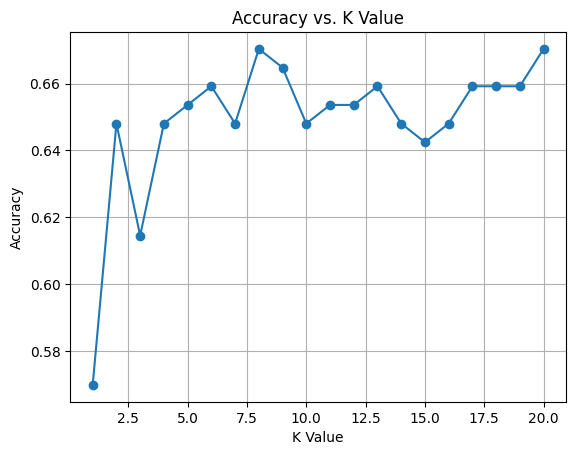

In [9]:
#KNN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load training data
train_data = pd.read_csv("/content/train (1).csv")

train_data= train_data.drop('Name', axis=1)
train_data= train_data.drop('Cabin', axis=1)
train_data= train_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
train_data["Sex"] = train_data["Sex"].replace({"male": 1, "female": 0})
train_data["Embarked"] = train_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})
train_data["Age"].fillna(0, inplace=True)
# Split features and target variable
X_train = train_data.drop("Survived", axis=1) # Assuming "Target" is the name of the target variable column
y_train = train_data["Survived"]

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform training data
X_train = imputer.transform(X_train)

# Load test data
test_data = pd.read_csv("/content/test (1).csv")
test_data= test_data.drop('Name', axis=1)
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
test_data["Age"].fillna(0, inplace=True)
test_data["Sex"] = test_data["Sex"].replace({"male": 1, "female": 0})
test_data["Embarked"] = test_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})

# Splitting the test data isn't necessary for KNN, but I'll keep it for consistency
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()

# Fit the model on training data
knn_model.fit(X_train_split, y_train_split)

# Predict on test split
y_pred = knn_model.predict(X_test_split)

# Calculate accuracy on test split
accuracy = accuracy_score(y_test_split, y_pred)
print("Accuracy on test split:", accuracy)


# Test different values of K
k_values = range(1, 21)  # Try K from 1 to 20
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_split, y_train_split)
    y_pred = knn_model.predict(X_test_split)
    accuracy = accuracy_score(y_test_split, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracies for different values of K
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



Accuracy on test split: 0.770949720670391


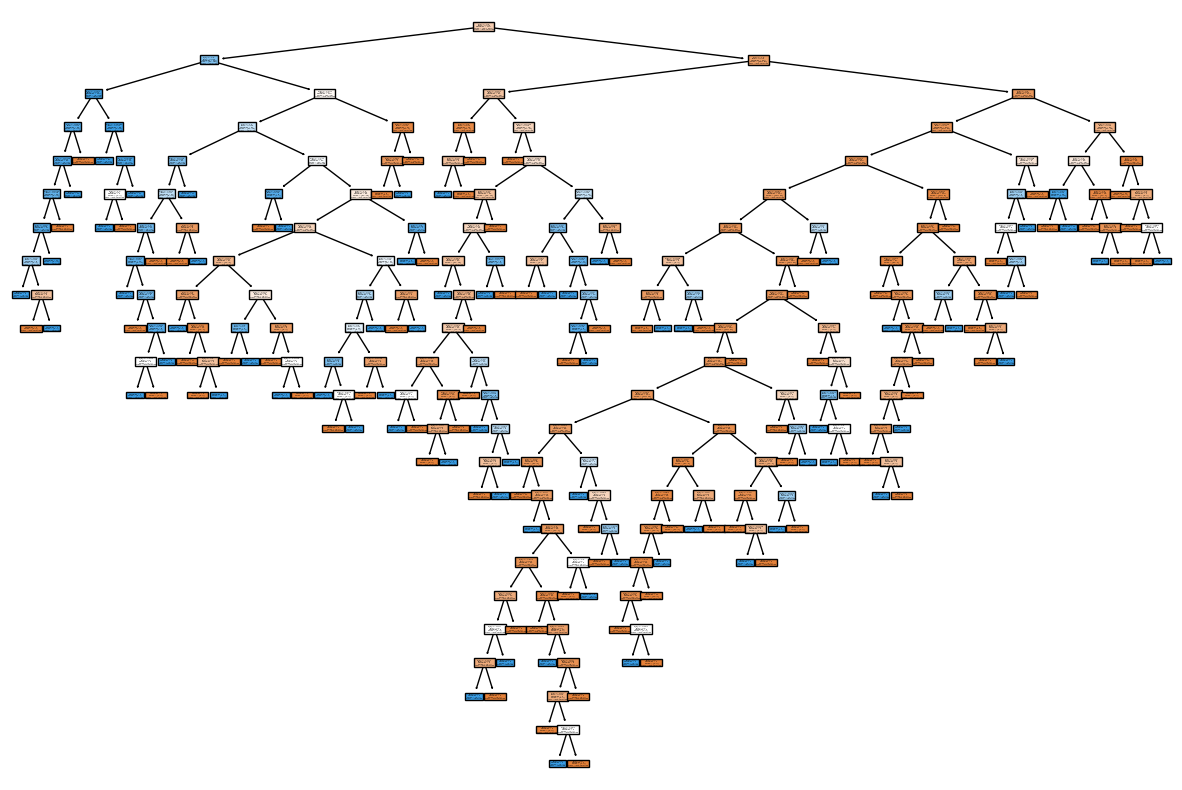

In [10]:
#Decision Trees
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import tree

# Load training data
train_data = pd.read_csv("/content/train (1).csv")

train_data= train_data.drop('Name', axis=1)
train_data= train_data.drop('Cabin', axis=1)
train_data= train_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
train_data["Sex"] = train_data["Sex"].replace({"male": 1, "female": 0})
train_data["Embarked"] = train_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})
train_data["Age"].fillna(0, inplace=True)
# Split features and target variable
X_train = train_data.drop("Survived", axis=1) # Assuming "Target" is the name of the target variable column
y_train = train_data["Survived"]

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform training data
X_train = imputer.transform(X_train)

# Load test data
test_data = pd.read_csv("/content/test (1).csv")
test_data= test_data.drop('Name', axis=1)
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
test_data["Age"].fillna(0, inplace=True)
test_data["Sex"] = test_data["Sex"].replace({"male": 1, "female": 0})
test_data["Embarked"] = test_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})

# Splitting the test data isn't necessary for Decision Tree, but I'll keep it for consistency
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Fit the model on training data
decision_tree_model.fit(X_train_split, y_train_split)

# Predict on test split
y_pred = decision_tree_model.predict(X_test_split)

# Calculate accuracy on test split
accuracy = accuracy_score(y_test_split, y_pred)
print("Accuracy on test split:", accuracy)

# Now, you can use the trained model to predict on the test data
# Assuming test data doesn't contain the target variable, we'll just use X_test_split for demonstration purposes
test_predictions = decision_tree_model.predict(X_test_split)
# Or if you have another test dataset
# test_predictions = decision_tree_model.predict(test_data)

# Plot the decision tree (for visualization purposes)
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_model, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Do something with test predictions


In [11]:
#Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load training data
train_data = pd.read_csv("/content/train (1).csv")

train_data= train_data.drop('Name', axis=1)
train_data= train_data.drop('Cabin', axis=1)
train_data= train_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
train_data["Sex"] = train_data["Sex"].replace({"male": 1, "female": 0})
train_data["Embarked"] = train_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})
train_data["Age"].fillna(0, inplace=True)
# Split features and target variable
X_train = train_data.drop("Survived", axis=1) # Assuming "Target" is the name of the target variable column
y_train = train_data["Survived"]

# Create an imputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform training data
X_train = imputer.transform(X_train)

# Load test data
test_data = pd.read_csv("/content/test (1).csv")
test_data= test_data.drop('Name', axis=1)
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Ticket', axis=1)
# Assuming the column containing gender information is called "Gender"
# Replace "male" with 1 and "female" with 0
test_data["Age"].fillna(0, inplace=True)
test_data["Sex"] = test_data["Sex"].replace({"male": 1, "female": 0})
test_data["Embarked"] = test_data["Embarked"].replace({"Q": 0, "S": 1, "C": 2})

# Splitting the test data isn't necessary for Random Forest, but I'll keep it for consistency
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier()  # Use default parameters, you can customize them as needed

# Fit the model on training data
rf_model.fit(X_train_split, y_train_split)

# Predict on test split
y_pred = rf_model.predict(X_test_split)

# Calculate accuracy on test split
accuracy = accuracy_score(y_test_split, y_pred)
print("Accuracy on test split:", accuracy)


Accuracy on test split: 0.8379888268156425
